# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[-1.92513752, -1.36982185],
        [-0.86323414,  0.73083816],
        [-1.49153445,  0.74707542],
        [-0.68856743,  1.27047521],
        [ 1.66350438, -1.60083465]]),
 array([1, 1, 1, 1, 0]))

In [4]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [19]:
# sampling
# sampling
n = 500
x1 = np.random.multivariate_normal(m1, sigma, n)
x_1 = np.random.multivariate_normal(m2, sigma, n)
X_generative = np.vstack([x1, x_1])
Y_generative = np.array([1]*500+[-1]*500)

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?

$$ \pi := p(y=1) $$
$$p(y=1|x) = \frac{\pi p(x|y=1)}{\pi p(x|y=1)+(1-\pi)p(x|y=-1)} = $$
$$ \frac{\pi p(x|y=1)/(1-\pi) p(x|y=-1)}{\pi p(x|y=1)/(1-\pi) p(x|y=-1) + 1} $$
Looking at the nominator:
$$\pi p(x|y=1)/(1-\pi) p(x|y=-1) $$
$$ \frac{\pi}{(1-\pi)} \frac{(2\pi)^{-d/2} \textrm{det}(\Sigma)^{-d/2} \exp(-(x-m_1)'\Sigma^{-1}(x-m_1)/2)}{(2\pi)^{-d/2} \textrm{det}(\Sigma)^{-d/2} \exp(-(x-m_2)'\Sigma^{-1}(x-m_2)/2)} = \exp(x'\Sigma^{-1}m_1 + \log(\pi/(1-\pi)) + m_2'\Sigma^{-1}m_2/2 -  m_1'\Sigma^{-1}m_1/2)$$
so it correspons to logistic model with
$$\beta_0=\log(\pi/(1-\pi)) + m_2'\Sigma^{-1}m_2/2 -  m_1'\Sigma^{-1}m_1/2,$$
$$\beta = \Sigma^{-1}(m_1 - m_2).$$



#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [8]:
# computing beta_0 and beta using the formulas
sigma_1 = np.linalg.inv(sigma)
beta = sigma_1.dot(m1 - m2)
p = 0.5
beta0 = np.log(p) - np.log(1 - p) + m2@(sigma_1@m2)/2 - m1@(sigma_1@m1)/2

In [10]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.01222065]), array([[2.10508519, 2.11203613]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [14]:
# sampling
Beta = -2
Beta = [2,2]
p =0.5
x1 = np.random.multivariate_normal(m1, sigma, 2*n)
x2 = np.random.multivariate_normal(m2, sigma, 2*n)
rands= np.random.binomial(1, 0.5, 2*n)
X_discriminative =  np.array([np.random.multivariate_normal(m1, sigma, 1)[0] if rand==0 else np.random.multivariate_normal(m2, sigma, 1)[0]  for rand in rands])
prob = 1/(1+np.exp(-(-2 + np.dot(X_discriminative, np.array([2,2])))))
Y_discriminative = np.random.binomial(1, prob, 2*n)

In [16]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.01222065]), array([[2.10508519, 2.11203613]]))

#### Second bullet point

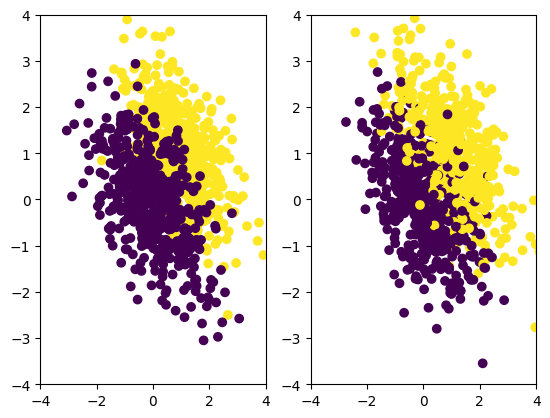

In [20]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:,0], X_discriminative[:,1], c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

In generative approach, we look at the problem as maximizing $f(x|Y=y)$ , whereas in generative: $P(Y=y|X=x)$. In both cases we have the same joint distributions.

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.


To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

**Answer:** We can use a formula, we obtained in a)

$$p(y=1|x) = \frac{\pi p(x|y=1)}{\pi p(x|y=1) + (1-\pi) p(x|y=-1)}.$$

Now we transform to get a formula for $p(x|y=-1)$:

$$ p(x|y=-1) = \frac{\pi p(x|y=1) (1- p(y=1|x))}{p(y=1|x)(1-\pi)}.$$

We plug in $p(x|y=1) = \exp(-x)$ as $X$ given $Y=1$ follows an exponential distribution with $\lambda=1$, $p(y=1|x) = 1/(1+\exp(-\beta_0-\beta_1 x))$ (a logistic model assumption) and $p(y=-1|x) = 1/(1+\exp(\beta_0+\beta_1 x))$, thus

$$ p(x|y=-1) = \frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)} = C_{\beta_0, \pi} \exp(-(\beta_1+1)x).$$

$X$ given $Y=-1$ also follows exponential distribution with $\lambda=\beta_1+1$.

------

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

------
If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.





Homework: find $C_{\beta_0, \pi}$. Next, knowing that $C_{\beta_0, \pi} = \beta_1+1$, derive the formula for $\beta_0$.


$$ p(x|y=-1) = \frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)} = C_{\beta_0, \pi} \exp(-(\beta_1+1)x)=$$
$$\frac{\pi}{1-\pi}\exp(-\beta_0) \exp(-x(1+\beta_1)) $$
$$ C_{\beta_0, \pi} = \frac{\pi}{1-\pi}\exp(-\beta_0) $$
next, knowing that $\beta_1=1$ and $\pi = \frac{1}{3}$:
$$1+\beta_1 =  \frac{\pi}{1-\pi}\exp(-\beta_0) $$
$$ 2 = \frac{\exp(-\beta_0)}{2}$$
$$ \beta_0 = - \log(4) $$
$$ \beta_0 = -1.386 $$


In [21]:
# sampling

beta1 = 1
n1 = 1000
x1 = np.random.exponential(1, size=n1)
n2 = 2000
x2 = np.random.exponential(1/(beta1 + 1), size=n2)
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [22]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)
(mod.intercept_, mod.coef_)

(array([-1.34423993]), array([[0.93285742]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

...

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

In [23]:
pi_c = n1 / (n1 + n2)
-np.log((1 - pi_c)/pi_c * (beta1 + 1))

-1.3862943611198908